In [2]:
import pandas as pd
import numpy as np
from jupyterthemes import jtplot

jtplot.style()

In [162]:
df = pd.read_csv('./../data/Monsteruitslagen_Resultaten.csv')
df['datetime'] = pd.to_datetime(df.datum + ' ' + df.tijd)

def convert_tappunt(x):
    x = str(x).lower()
    if 'thermostatische douchemengkraan' in x or 'therm.' in x:
        return 'Thermostatische douchemengkraan'
    if 'douche' in x:
        return 'douche'
    if '1e tappunt' in x:
        return '1e tappunt'
    return 'overige'

def convert_ruimte(x):
    x = str(x).lower()
    if 'kelder' in x:
        return 'kelder'
    if 'kamer' in x:
        return 'kamer'
    if 'appartement' in x:
        return 'appartement'
    if 'technische ruimte' in x:
        return 'technische ruimte'
    if 'kapsalon' in x:
        return 'kapsalon'
    return 'overige'
    
df['tappunt_simple'] = df.tappunt.apply(convert_tappunt)
df['ruimte_simple'] = df.ruimte.apply(convert_ruimte)
df['location_is_Noorderkroon'] = df.locatienaam.str.contains('Noorderkroon')

df_tmp = df[df.component == 'Totaal Legionella spp'].copy()
df_tmp.resultaat = df_tmp.resultaat.str.replace('<100', '0').astype(int)
df_tmp.resultaat.groupby(pd.qcut(df_tmp.tempvoor, 4)).describe()

In [34]:
(df_tmp.resultaat > 0).astype(int).groupby(df_tmp.analyzepakket).describe()

,count,mean,std,min,25%,50%,75%,max
analyzepakket,,,,,,,,
HDSC_11,147.0,0.278912,0.449997,0.0,0.0,0.0,1.0,1.0
HDSC_3D_KZ,314.0,0.324841,0.469063,0.0,0.0,0.0,1.0,1.0


In [50]:
(df_tmp.resultaat > 0).astype(int).groupby(df_tmp.datetime.dt.hour).describe()

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
8,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
9,14.0,0.142857,0.363137,0.0,0.0,0.0,0.00,1.0
10,60.0,0.416667,0.497167,0.0,0.0,0.0,1.00,1.0
11,82.0,0.451220,0.500677,0.0,0.0,0.0,1.00,1.0
12,91.0,0.285714,0.454257,0.0,0.0,0.0,1.00,1.0
13,98.0,0.234694,0.425986,0.0,0.0,0.0,0.00,1.0
14,94.0,0.265957,0.444211,0.0,0.0,0.0,1.00,1.0
15,20.0,0.250000,0.444262,0.0,0.0,0.0,0.25,1.0
16,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0


In [133]:
(df_tmp.resultaat > 0).astype(int).groupby(df_tmp['ruimte_simple']).describe()

,count,mean,std,min,25%,50%,75%,max
ruimte_simple,,,,,,,,
appartement,157.0,0.471338,0.500775,0.0,0.0,0.0,1.0,1.0
kamer,211.0,0.322275,0.468459,0.0,0.0,0.0,1.0,1.0
kapsalon,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
kelder,77.0,0.012987,0.113961,0.0,0.0,0.0,0.0,1.0
overige,9.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [165]:
(df_tmp.resultaat > 0).astype(int).groupby(df_tmp['location_is_Noorderkroon']).describe()

,count,mean,std,min,25%,50%,75%,max
location_is_Noorderkroon,,,,,,,,
False,219.0,0.178082,0.383458,0.0,0.0,0.0,0.0,1.0
True,242.0,0.429752,0.496067,0.0,0.0,0.0,1.0,1.0


In [164]:
(df_tmp.resultaat > 0).astype(int).groupby(df_tmp['omschrijving order']).describe()

,count,mean,std,min,25%,50%,75%,max
omschrijving order,,,,,,,,
Extra mon 1 monster,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
Halfj koper/zilver,52.0,0.269231,0.447888,0.0,0.00,0.0,1.00,1.0
Halfj koper/zilver + 2 hol,12.0,0.333333,0.492366,0.0,0.00,0.0,1.00,1.0
Halfj mon,107.0,0.196262,0.399038,0.0,0.00,0.0,0.00,1.0
Halfj mon + extra mon,11.0,0.363636,0.504525,0.0,0.00,0.0,1.00,1.0
Hol 1 monster,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
Hol 1 monster na thermische reiniging,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
Hol 2 monsters na chemische reiniging,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
Hol 2 monsters na thermische reiniging,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0


In [59]:
(df_tmp.resultaat > 0).astype(int).groupby(df_tmp.tappunt_simple).describe().sort_values('count')

,count,mean,std,min,25%,50%,75%,max
tappunt_simple,,,,,,,,
overige,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1e tappunt,74.0,0.013514,0.116248,0.0,0.0,0.0,0.0,1.0
Thermostatische douchemengkraan,127.0,0.401575,0.492158,0.0,0.0,0.0,1.0,1.0
douche,256.0,0.355469,0.479593,0.0,0.0,0.0,1.0,1.0


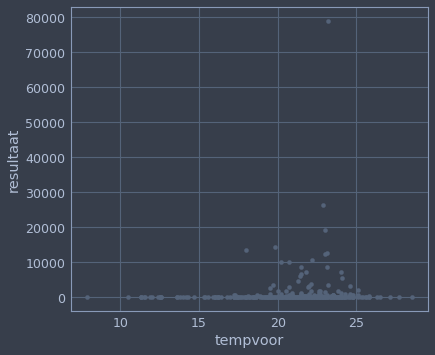

In [29]:
df_tmp[['resultaat', 'tempvoor']].plot.scatter('tempvoor', 'resultaat')

In [166]:
y = df_tmp.resultaat == 0
X = df_tmp[['tempvoor', 'tempna']].copy()
X['tappunt_1'] = df_tmp.tappunt_simple == 'douche'
X['tappunt_2'] = df_tmp.tappunt_simple == '1e tappunt'
X['uit_tap'] = df_tmp.soort == 'Koud water'
X['is_kamer'] = df_tmp.ruimte_simple == 'kamer'
X['is_appartement'] = df_tmp.ruimte_simple == 'appartement'

X['feature_dt'] = df_tmp.datetime.dt.hour
X['feature_dow'] = df_tmp.datetime.dt.dayofweek
X['location_is_Noorderkroon'] = df_tmp.location_is_Noorderkroon

In [167]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [168]:
model.feature_importances_

array([357, 369,  50,  41,  22,  30,  18,  86,  55,  45])

In [169]:
df_res = pd.DataFrame({
    'predict': model.predict(X_test),
    'actual': y_test.astype(int)})

In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_res.actual, df_res.predict)

array([[16, 37],
       [14, 86]])

In [151]:
df_res.groupby('actual').count()

,predict
actual,
0,48
1,105


In [176]:
df_spoelen = pd.read_csv('../data/Beheerdersplan_Spoelen.csv')

In [177]:
df_spoelen = df_spoelen[df_spoelen.uitgevoerd == 'JA']

In [186]:
df_spoelen['ruimte'].unique()

array(['0.14/0.15 Technische ruimte kelder', '0.10 Wasruimte kelder',
       '0.10 Wasruimte (tapkraan scrobmachine)', 'Kleedruimte heren',
       'Kleedruimte dames', 'Spoelbak nabij de receptie begane grond',
       '0.10 Bereidingskeuken', '0.11 Centrale afwaskeuken',
       '0.15 Huiskamer groepswoning 1 PG',
       '0.62 Huiskamer oude groepswoning 4 PG',
       '0.60 Teampost PG afdeling', '1.60 Personeelsruimte',
       '1.02 Kapsalon', '1.47 Huiskamer', '1.21 Werkkast',
       '1.20 Teampost ruimte 1 en 3', '1.42 Huiskamer en eetkamer',
       'Zusterspost Revalidatie', '2.06 Logopodie/Psyo ruimte',
       '2.08 Fysiotherapieruimte',
       '2.10 Fysiotherapieruimte behandelkamer',
       '2.11 Fysiotherapieruimte opslagruimte',
       '2.13 Activiteitenbegeleiding', '2.45 Miva Toiletruimte',
       '2.34 Teampost', '2.42 Huiskamer groepverzorging',
       '2.39 Huiskamer groep verzorging', "3.14 Ruimte 3.14 'T Palet",
       '3.28 Orangerie/ huiskamer', '3.42 Logeerkamer bewon

In [185]:
df['ruimte'].unique()

array(['Kelder koper/zilver ruimte', 'Appartement 305',
       'Werkplaats kelder', 'Badkamer appartement 2.48',
       'Appartement 113', 'Appartement 20 PG',
       'Badkamer appartement 2.66', 'Kamer 070 4 PG',
       'Badkamer appartement 2.50', 'Techniekruimte C1.17 kelder',
       'Techniek ruimte C1.17 kelder', 'Appartement 209',
       'Appartement 326', 'Appartement 317', 'Appartement 227',
       'Appartement 123', 'Appartement 30 PG', 'Technische ruimte',
       'Badkamer appartement 3.34', 'Badkamer appartement 3.63',
       'Badkamer appartement 2.58', 'Badkamer appartement 1.46',
       'Badkamer appartement 1.56', 'Spoelkeuken 0.11', 'Appartement 211',
       'Badkamer appartement 2.30', 'Badkamer appartement 2.31',
       'Watermeterruimte', 'Appartement 316', 'Technische ruimte boiler',
       'Kelder koper zilver ruimte', 'Zusterspost 2.34 tweede verd.',
       'Werkplaats kelder 1e tappunt na CU/AG',
       'Centrale afwaskeuken begane grond',
       'Appartement 30 